In [1]:
import itertools
from datetime import datetime

import numpy as np
import sklearn.svm
from sklearn.model_selection import cross_val_score

import prepare_data

In [2]:
# part 1
start = datetime.now()
data, target = prepare_data.get('fertility.data')

classifier = sklearn.svm.SVC()

print 'Original classification result:'
res = cross_val_score(classifier, data, target, cv=10)
print res
print 'Mean:', np.mean(res), '\n'

combinations = []
transposed = data.T

for i in range(1, len(data[0])):
    for sub in itertools.combinations(range(0, len(data[0])), len(data[0])-i):
        combinations.append(np.array(sub))

results = []
for i in range(1, len(data[0])):
    print 'progress:', i, 'in', len(data[0])-1
    subs = []
    for sub in itertools.combinations(transposed, len(transposed)-i):
        subs.append(np.array(sub))
    for d in subs:
        res = cross_val_score(classifier, d.T, target, cv=10)
        results.append(np.mean(res))

print 'time:', datetime.now()-start, '\n'
res_str = []
for i in range(0, len(results)):
    res_str.append(str(results[i]) + ' for ' + str(combinations[i]))

res_str.sort()
print 'Result:', res_str[len(res_str)-1]

data size: 100
# features: 9
Original classification result:
[ 0.81818182  0.90909091  0.9         0.9         0.9         0.9         0.8
  0.9         0.88888889  0.77777778]
Mean: 0.869393939394 

progress: 1 in 8
progress: 2 in 8
progress: 3 in 8
progress: 4 in 8
progress: 5 in 8
progress: 6 in 8
progress: 7 in 8
progress: 8 in 8
time: 0:00:10.751000 

Result: 0.910505050505 for [1 3 4 5 6]


In [3]:
# part 2
from sklearn.ensemble import ExtraTreesClassifier

data, target = prepare_data.get('fertility.data')
forest = ExtraTreesClassifier(n_estimators=250, random_state=0)

forest.fit(data, target)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
indices = np.argsort(importances)[::-1]
print("Feature ranking:")
for f in range(data.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

data size: 100
# features: 9
Feature ranking:
1. feature 3 (0.169945)
2. feature 5 (0.154131)
3. feature 4 (0.151223)
4. feature 2 (0.131572)
5. feature 0 (0.110111)
6. feature 1 (0.080421)
7. feature 7 (0.077041)
8. feature 6 (0.077014)
9. feature 8 (0.048541)


data size: 100
# features: 9
# attributes: 1 Mean: 0.881414141414
# attributes: 2 Mean: 0.881414141414
# attributes: 3 Mean: 0.871414141414
# attributes: 4 Mean: 0.850303030303
# attributes: 5 Mean: 0.850303030303
# attributes: 6 Mean: 0.860303030303
# attributes: 7 Mean: 0.869393939394
# attributes: 8 Mean: 0.869393939394
# attributes: 9 Mean: 0.869393939394


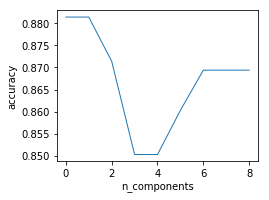

In [4]:
# part 3
from sklearn import decomposition
import matplotlib.pyplot as plt

data, target = prepare_data.get('fertility.data')
classifier = sklearn.svm.SVC()
acc_results = []

for i in range(1, len(data[0]) + 1):
    d = data
    pca = decomposition.PCA(n_components=i)
    pca.fit(d)
    data_new = pca.transform(d)
    res = sklearn.model_selection.cross_val_score(classifier, data_new, target, cv=10)
    acc_results.append(np.mean(res))
    print '# attributes:', i, 'Mean:', np.mean(res)

plt.figure(1, figsize=(4, 3))
plt.clf()
plt.axes([.1, .1, .7, .7])
plt.plot(acc_results, linewidth=1)
plt.xlabel('n_components')
plt.ylabel('accuracy')
plt.show()